<a href="https://colab.research.google.com/github/Sachiteltumbade/Green-Destination-Data-Analysis/blob/main/Green_Destination_UM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing important librabies for data manipulation and analysis and for data visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/greendestination (1).csv') #reading csv file from google drive

In [ ]:
#checking missing values
missing_values = data.isnull().sum()
print(missing_values)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
data.info() #shows the total number of columns and rows along with its name and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
data.describe() #descrbing the data

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
#checking duplicated
duplicates = data.duplicated().sum()
print('Number of Duplicates: ', duplicates)

Number of Duplicates:  0


In [ ]:
#EDA Checking the outliers
def detect_outliers_iqr(df):
  outliers = []
  for col in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers.extend(df[(df[col]<lower_bound) | (df[col]>upper_bound)].index)
  return list(set(outliers))

In [ ]:
outliers = detect_outliers_iqr(data)
print('Number of Outliers: ', len(outliers))

Number of Outliers:  691


In [ ]:
#removing outliers from the original dataframe and storing the clean data in df called 'data_cleaned'.
data_cleaned = data.drop(outliers)

In [ ]:
data.shape #displays the dimensions of the df 'data' i.e number of rows and columns

(1470, 35)

In [ ]:
data_cleaned.shape
print('data cleared')

data cleared


In [ ]:
#data visualization
attrition_rate = data_cleaned['Attrition'].value_counts(normalize=True)*100
print('Attrition Rate:\n',attrition_rate)

Attrition Rate:
 Attrition
No     82.284981
Yes    17.715019
Name: proportion, dtype: float64


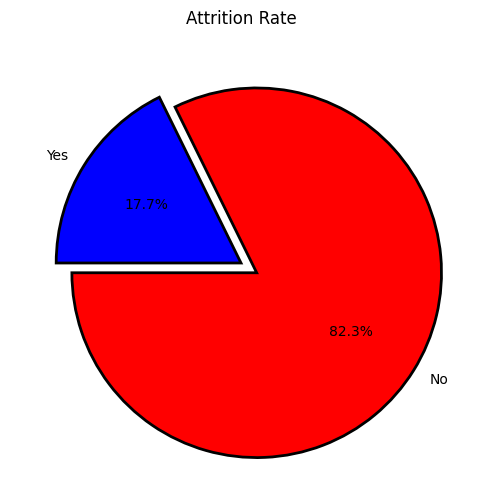

In [ ]:
attrition_counts = data_cleaned['Attrition'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%',
        colors=['r','b'],startangle = 180,explode = [0.1,0],
        wedgeprops = {'linewidth':2,'width':1, 'edgecolor':'k'})
plt.title('Attrition Rate')
plt.show()

In [ ]:
summary_stats = data_cleaned.describe()
summary_stats

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,779.000000,779.000000,779.000000,779.000000,779.0,779.000000,779.000000,779.000000,779.000000,779.000000,...,779.000000,779.0,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000
mean,35.332478,803.163030,9.428755,2.890886,1.0,1038.517330,2.727856,66.060334,2.740693,1.750963,...,2.699615,80.0,0.666239,8.956354,2.522465,2.752246,5.391528,3.563543,1.422336,3.512195
std,8.556548,401.254015,8.179603,1.020185,0.0,598.193343,1.080504,20.509768,0.711293,0.751765,...,1.086083,0.0,0.694471,5.249130,0.754044,0.716303,3.650824,3.029335,1.971536,3.047320
min,18.000000,103.000000,1.000000,1.000000,1.0,4.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,468.500000,2.000000,2.000000,1.0,507.500000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,5.000000,2.000000,2.000000,2.000000,2.000000,0.000000,2.000000
50%,34.000000,809.000000,7.000000,3.000000,1.0,1018.000000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,9.000000,2.000000,3.000000,5.000000,2.000000,1.000000,2.000000
75%,40.000000,1155.500000,15.000000,4.000000,1.0,1568.500000,4.000000,84.000000,3.000000,2.000000,...,4.000000,80.0,1.000000,11.000000,3.000000,3.000000,8.000000,7.000000,2.000000,7.000000
max,60.000000,1498.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,4.000000,...,4.000000,80.0,2.000000,28.000000,4.000000,4.000000,18.000000,14.000000,7.000000,13.000000


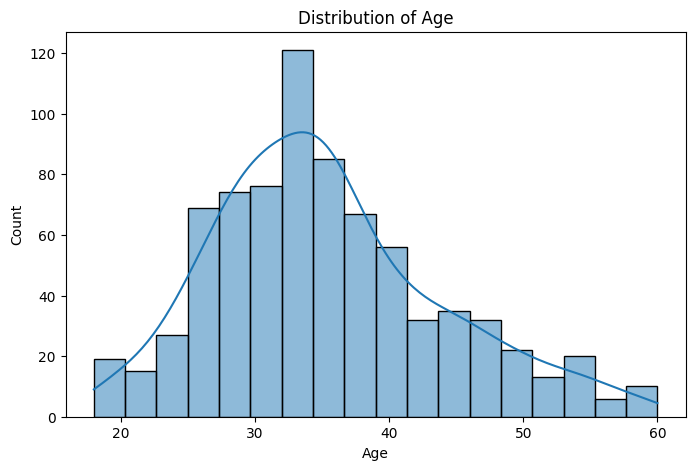

In [ ]:
#plot to visualize the distribution of ages in the data_cleaned dataset with the plot having a specific size and title for clarity
plt.figure(figsize=(8,5))
sns.histplot(data_cleaned['Age'],kde=True) #function to create a histogram
plt.title('Distribution of Age')
plt.show()

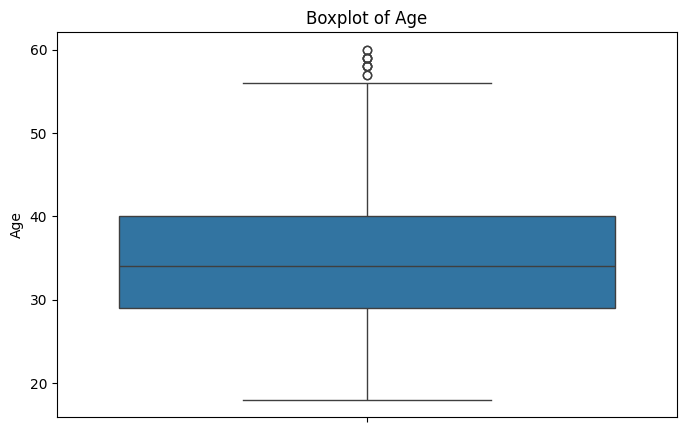

In [ ]:
#Box plots are useful for identifying the median, quartiles, and potential outliers in the data
plt.figure(figsize=(8,5))
sns.boxplot(data_cleaned['Age']) #specifies the data to be used for the box plot that is the 'Age' column from the 'data_cleaned' dataframe
plt.title('Boxplot of Age')
plt.show()

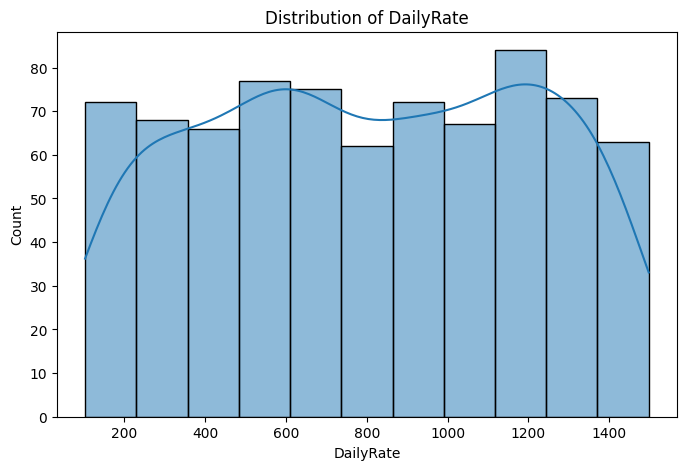

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data_cleaned['DailyRate'],kde=True) #specifies the data to be used for the histogram that is the 'DailyRate' column from the 'data_cleaned' dataframe
plt.title('Distribution of DailyRate')
plt.show()

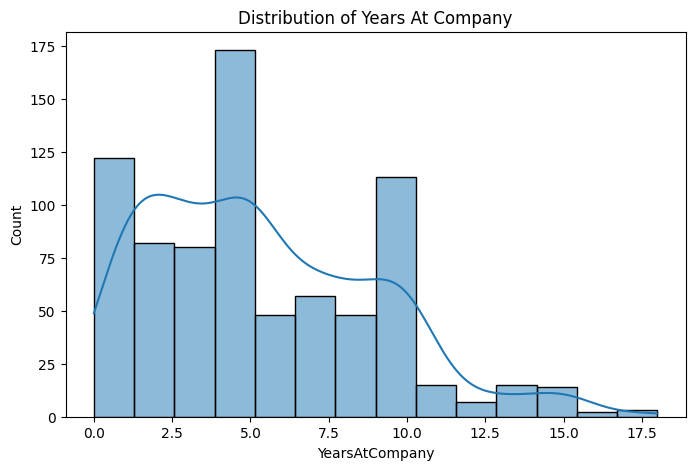

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data_cleaned['YearsAtCompany'], kde =True) ##specifies the data to be used for the histogram that is the 'YearsAtCompany' column from the 'data_cleaned' dataframe
plt.title('Distribution of Years At Company')
plt.show()

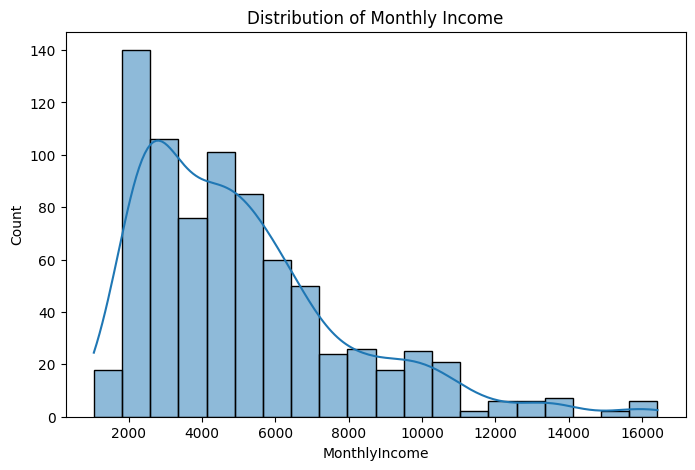

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data_cleaned['MonthlyIncome'], kde =True) #specifies the data to be used for the histogram - the 'MonthlyIncome' column from the 'data_cleaned' dataframe
plt.title('Distribution of Monthly Income')
plt.show()

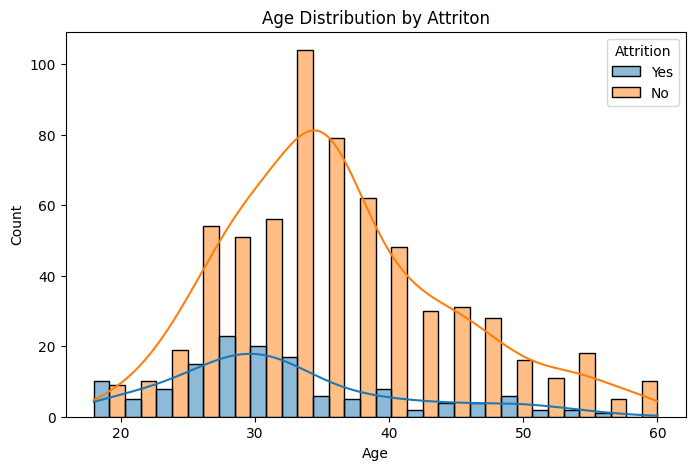

In [ ]:
#This visualization helps to understand how age is related to attrition, by comparing the age distributions of employees who left the company versus those who stayed
plt.figure(figsize=(8,5))
sns.histplot(data_cleaned, x = 'Age', hue = 'Attrition', multiple='dodge', kde =True) #plots to visualize the distribution of 'Age' for different attrition categories in the data_cleaned dataset
plt.title('Age Distribution by Attriton')
plt.show()

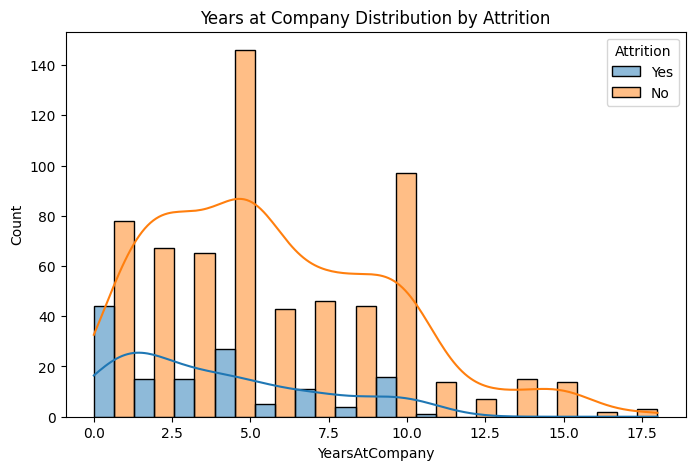

In [ ]:
#generates a histogram along with kernel density plots to visualize the distribution of 'YearsAtCompany' for different attrition categories in the data_cleaned dataset
plt.figure(figsize=(8,5))
sns.histplot(data = data_cleaned, x = 'YearsAtCompany', hue = 'Attrition', multiple='dodge', kde =True)
plt.title('Years at Company Distribution by Attrition')
plt.show()

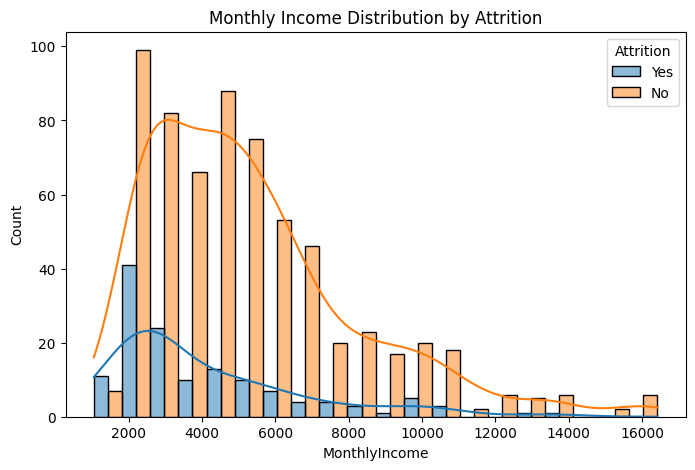

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data_cleaned, x = 'MonthlyIncome', hue = 'Attrition', multiple='dodge', kde =True)
plt.title('Monthly Income Distribution by Attrition')
plt.show()

In [ ]:
df = pd.DataFrame(data_cleaned)
df.to_csv('/content/sample_data.csv', index=False)